## Data Cleaning and pre-processing for Gold Price Prediction

### Importing all the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

### Reading the csv data using pandas

In [5]:
df=pd.read_csv('project_data.csv',index_col='Date', parse_dates = True, infer_datetime_format = True)
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

              Volume     SP_open     SP_high      SP_low    SP_close  \
Date                                                                   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998   

            SP_Ajclose  SP_volume      DJ_open      DJ_high       DJ_low  \
Date                                                                       
2011-12-15  105.441238  199109200  11825.29004  11967.83984  11825.21973   
2011-12-16  105.597549  220481400  11870.25000  11968.17969  11819.30957   
2011-12-19  104.468536  183903000  11866.54004  11925.87988  11735.19043   
2011-12-20  107.629784  225418100  11769.20996  12117.12988  11768.83008   
2011-12-21  107.838242  194230900  12103.58008  12119.70020  11999.44043   

               DJ_close   DJ_Ajclose  DJ_volume    EG_open    EG_high  \
Date                                                                    
2011-12-15  11868.80957  11868.80957  136930000  74.550003  76.150002   
2011-12-16  11866.38965  11866.38965  389520000  73.599998  75.099998   
2011-12-19  11766.25977  11766.25977  135170000  69.099998  69.800003   
2011-12-20  12103.58008  12103.58008  165180000  66.449997  68.099998   
2011-12-21  12107.74023  12107.74023  163250000  67.099998  69.400002   

               EG_low   EG_close  EG_Ajclose  EG_volume  EU_Price  EU_open  \
Date                                                                         
2011-12-15  72.150002  72.900002   70.431755     787900    1.3018   1.2982   
2011-12-16  73.349998  74.900002   72.364037     896600    1.3035   1.3020   
2011-12-19  64.199997  64.699997   62.509384    2096700    1.2995   1.3043   
2011-12-20  66.000000  67.000000   64.731514     875300    1.3079   1.3003   
2011-12-21  66.900002  68.500000   66.180725     837600    1.3045   1.3079   

            EU_high  EU_low  EU_Trend  OF_Price  OF_Open  OF_High  OF_Low  \
Date                                                                        
2011-12-15   1.3051  1.2957         1    105.09   104.88   106.50  104.88   
2011-12-16   1.3087  1.2997         1    103.35   103.51   104.56  102.46   
2011-12-19   1.3044  1.2981         0    103.64   103.63   104.57  102.37   
2011-12-20   1.3133  1.2994         1    106.73   104.30   107.27  103.91   
2011-12-21   1.3197  1.3024         0    107.71   107.15   108.17  106.16   

            OF_Volume  OF_Trend  OS_Price  OS_Open  OS_High  OS_Low  OS_Trend  \
Date                                                                            
2011-12-15      14330         1     93.42    94.91    96.00   93.33         0   
2011-12-16     140080         0     93.79    93.43    94.80   92.53         1   
2011-12-19     147880         1     94.09    93.77    94.43   92.55         1   
2011-12-20     170240         1     95.55    96.39    99.70   96.39         1   
2011-12-21     145090         1     99.01    97.54    99.26   96.81         1   

            SF_Price  SF_Open  SF_High  SF_Low  SF_Volume  SF_Trend  \
Date                                                                  
2011-12-15     53604    54248    54248   52316     119440         1   
2011-12-16     53458    53650    54030   52890      65390         0   
2011-12-19


# 1. DATA CLEANING


### Getting an overview of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

### Getting the technical indications of the data

In [7]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087498   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000   
mean   8.446327e+06   204.490023   205.372637   203.487014   204.491222   
std    4.920731e+06    43.831928    43.974644    43.618940    43.776999   
min    1.501600e+06   122.059998   122.320000   120.029999   120.290001   
25%    5.412925e+06   170.392498   170.962506   169.577499   170.397500   
50%    7.483900e+06   205.464996   206.459999   204.430000   205.529999   
75%    1.020795e+07   237.292500   237.722500   236.147503   236.889996   
max    9.380420e+07   293.089996   293.940002   291.809998   293.579987   

        SP_Ajclose     SP_volume       DJ_open       DJ_high        DJ_low  \
count  1718.000000  1.718000e+03   1718.000000   1718.000000   1718.000000   
mean    192.204570  1.098026e+08  18161.094398  18244.137842  18073.889095   
std      48.514161  4.925110e+07   3889.752079   3906.008604   3867.959072   
min     104.468536  2.785650e+07  11769.209960  11925.879880  11735.190430   
25%     153.027992  7.387085e+07  15487.930173  15551.170168  15419.387207   
50%     191.658341  9.972020e+07  17601.095705  17714.395510  17510.290040   
75%     228.721389  1.351161e+08  20866.907225  20910.837405  20785.035648   
max     290.560242  5.072443e+08  26833.470700  26951.810550  26789.080080   

           DJ_close    DJ_Ajclose     DJ_volume      EG_open      EG_high  \
count   1718.000000   1718.000000  1.718000e+03  1718.000000  1718.000000   
mean   18164.119043  18164.119043  1.779131e+08    28.276554    28.822555   
std     3884.495887   3884.495887  1.212753e+08    20.325861    20.620624   
min    11766.259770  11766.259770  8.410000e+06     2.770000     2.850000   
25%    15495.665280  15495.665280  9.232000e+07    14.200000    14.550000   
50%    17612.939455  17612.939455  1.206950e+08    22.800000    23.125000   
75%    20851.157715  20851.157715  2.636300e+08    37.150002    37.849998   
max    26828.390630  26828.390630  9.005100e+08    80.199997    81.000000   

            EG_low     EG_close   EG_Ajclose     EG_volume     EU_Price  \
count  1718.000000  1718.000000  1718.000000  1.718000e+03  1718.000000   
mean     27.653655    28.209302    27.783958  1.136074e+06     1.208494   
std      19.972314    20.294635    19.721857  7.301289e+05     0.100535   
min       2.730000     2.800000     2.800000  1.645000e+05     1.038700   
25%      13.762500    14.150000    14.082418  7.006250e+05     1.120800   
50%      21.800000    22.524999    22.408089  9.688000e+05     1.184050   
75%      36.450001    37.187501    36.811500  1.344775e+06     1.305550   
max      77.900002    79.800003    77.999313  1.006120e+07     1.393400   

           EU_open      EU_high       EU_low     EU_Trend     OF_Price  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean      1.208531     1.213360     1.203692     0.494761    77.504523   
std       0.100579     0.100184     0.100695     0.500118    27.400703   
min       1.039000     1.041900     1.034100     0.000000    27.880000   
25%       1.120900     1.125800     1.115900     0.000000    52.152500   
50%       1.184100     1.187850     1.179450     0.000000    70.115000   
75%       1.305475     1.310275     1.299850     1.000000   107.730000   
max   

### Finding the null values in the data

In [8]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64

### Plotting the null values using a heatmap

<AxesSubplot:ylabel='Date'>

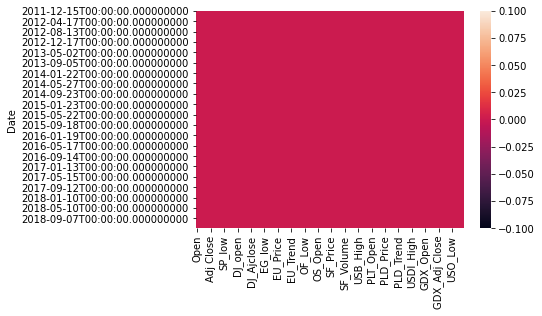

In [9]:
sns.heatmap(df.isnull())

## Since there is no color variation in the heatmap, this shows that there are no null values in the dataset


# 2. Exploratory Data Analysis

### Plotting the correlation

In [10]:
df.corr()

Open      High       Low     Close  Adj Close    Volume  \
Open           1.000000  0.999515  0.999442  0.998976   0.998976  0.251921   
High           0.999515  1.000000  0.999262  0.999535   0.999535  0.261064   
Low            0.999442  0.999262  1.000000  0.999532   0.999532  0.237031   
Close          0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
Adj Close      0.998976  0.999535  0.999532  1.000000   1.000000  0.246778   
...                 ...       ...       ...       ...        ...       ...   
USO_High       0.634864  0.637208  0.633623  0.635311   0.635311  0.083064   
USO_Low        0.634277  0.636538  0.633140  0.634732   0.634732  0.080475   
USO_Close      0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Adj Close  0.635138  0.637483  0.633994  0.635675   0.635675  0.081642   
USO_Volume    -0.455920 -0.454913 -0.457628 -0.456193  -0.456193  0.069580   

                SP_open   SP_high    SP_low  SP_close  SP_Ajclose  SP_volume  \
Open          -0.684314 -0.684597 -0.683464 -0.683998   -0.665788   0.242265   
High          -0.688118 -0.688365 -0.687325 -0.687817   -0.669657   0.247883   
Low           -0.680911 -0.681242 -0.679988 -0.680567   -0.662325   0.235838   
Close         -0.684618 -0.684904 -0.683750 -0.684284   -0.666071   0.241949   
Adj Close     -0.684618 -0.684904 -0.683750 -0.684284   -0.666071   0.241949   
...                 ...       ...       ...       ...         ...        ...   
USO_High      -0.774626 -0.775482 -0.773550 -0.774799   -0.786760   0.255344   
USO_Low       -0.771235 -0.772154 -0.770087 -0.771396   -0.783347   0.249038   
USO_Close     -0.773099 -0.773957 -0.771928 -0.773159   -0.785103   0.251419   
USO_Adj Close -0.773099 -0.773957 -0.771928 -0.773159   -0.785103   0.251419   
USO_Volume     0.375568  0.377996  0.371390  0.374658    0.386096   0.045722   

                DJ_open   DJ_high    DJ_low  DJ_close  DJ_Ajclose  DJ_volume  \
Open          -0.588615 -0.588534 -0.587941 -0.588179   -0.588179  -0.155915   
High          -0.592459 -0.592376 -0.591864 -0.592072   -0.592072  -0.157978   
Low           -0.585021 -0.585009 -0.584304 -0.584592   -0.584592  -0.153442   
Close         -0.588800 -0.588778 -0.588157 -0.588411   -0.588411  -0.155526   
Adj Close     -0.588800 -0.588778 -0.588157 -0.588411   -0.588411  -0.155526   
...                 ...       ...       ...       ...         ...        ...   
USO_High      -0.723275 -0.723594 -0.722477 -0.723223   -0.723223  -0.471997   
USO_Low       -0.719607 -0.719975 -0.718726 -0.719539   -0.719539  -0.469188   
USO_Close     -0.721539 -0.721857 -0.720646 -0.721378   -0.721378  -0.470608   
USO_Adj Close -0.721539 -0.721857 -0.720646 -0.721378   -0.721378  -0.470608   
USO_Volume     0.315246  0.316818  0.310782  0.313761    0.313761   0.166826   

                EG_open   EG_high    EG_low  EG_close  EG_Ajclose  EG_volume  \
Open           0.863226  0.861273  0.863740  0.862066    0.859143  -0.127269   
High           0.864864  0.863336  0.865556  0.864276    0.861358  -0.124106   
Low            0.861282  0.859493  0.862220  0.860614    0.857697  -0.129967   
Close          0.862900  0.861479  0.863917  0.862770    0.859850  -0.126586   
Adj Close      0.862900  0.861479  0.863917  0.862770    0.859850  -0.126586   
...                 ...       ...       ...       ...         ...        ...   
USO_High       0.813469  0.813497  0.814438  0.813668    0.815341  -0.225780   
USO_Low        0.810740  0.810710  0.811780  0.810940    0.812621  -0.225984   
USO_Close      0.812185  0.812206  0.813235  0.812468    0.814141  -0.225570   
USO_Adj Close  0.812185  0.812206  0.813235  0.812468    0.814141  -0.225570   
USO_Volume    -0.494368 -0.493028 -0.496713 -0.494390   -0.495517   0.128743   

               EU_Price   EU_open   EU_high    EU_low  EU_Trend  OF_Price  \
Open           0.580586  0.579304  0.582948  0.577043  0.010250  0.710348   
High           0.581787  0.580143  0.584050  

In [11]:
#As our target variable will be adj_close so we've to sort its value before processing
#abs() being used for removing any ambiguity from values
cor=df.corr().abs()['Adj Close'].sort_values(ascending=False)
corr_d=cor[cor < 0.50]
corr_d

USB_High       0.464116
USO_Volume     0.456193
USB_Price      0.441347
USB_Open       0.440822
USB_Low        0.417352
Volume         0.246778
SP_volume      0.241949
OF_Volume      0.225436
PLD_High       0.217490
PLD_Open       0.216426
PLD_Low        0.214919
PLD_Price      0.213179
USDI_Volume    0.205954
DJ_volume      0.155526
EG_volume      0.126586
RHO_PRICE      0.095782
OS_Trend       0.059510
OF_Trend       0.048205
SF_Trend       0.028100
PLD_Trend      0.026536
USB_Trend      0.025933
EU_Trend       0.019913
USDI_Trend     0.016641
PLT_Trend      0.011355
Name: Adj Close, dtype: float64

In [12]:
to_drop=list(corr_d.index)
df1=df.drop(to_drop,axis=1)
df1.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

               SP_open     SP_high      SP_low    SP_close  SP_Ajclose  \
Date                                                                     
2011-12-15  123.029999  123.199997  121.989998  122.180000  105.441238   
2011-12-16  122.230003  122.949997  121.300003  121.589996  105.597549   
2011-12-19  122.059998  122.320000  120.029999  120.290001  104.468536   
2011-12-20  122.180000  124.139999  120.370003  123.930000  107.629784   
2011-12-21  123.930000  124.360001  122.750000  124.169998  107.838242   

                DJ_open      DJ_high       DJ_low     DJ_close   DJ_Ajclose  \
Date                                                                          
2011-12-15  11825.29004  11967.83984  11825.21973  11868.80957  11868.80957   
2011-12-16  11870.25000  11968.17969  11819.30957  11866.38965  11866.38965   
2011-12-19  11866.54004  11925.87988  11735.19043  11766.25977  11766.25977   
2011-12-20  11769.20996  12117.12988  11768.83008  12103.58008  12103.58008   
2011-12-21  12103.58008  12119.70020  11999.44043  12107.74023  12107.74023   

              EG_open    EG_high     EG_low   EG_close  EG_Ajclose  EU_Price  \
Date                                                                           
2011-12-15  74.550003  76.150002  72.150002  72.900002   70.431755    1.3018   
2011-12-16  73.599998  75.099998  73.349998  74.900002   72.364037    1.3035   
2011-12-19  69.099998  69.800003  64.199997  64.699997   62.509384    1.2995   
2011-12-20  66.449997  68.099998  66.000000  67.000000   64.731514    1.3079   
2011-12-21  67.099998  69.400002  66.900002  68.500000   66.180725    1.3045   

            EU_open  EU_high  EU_low  OF_Price  OF_Open  OF_High  OF_Low  \
Date                                                                       
2011-12-15   1.2982   1.3051  1.2957    105.09   104.88   106.50  104.88   
2011-12-16   1.3020   1.3087  1.2997    103.35   103.51   104.56  102.46   
2011-12-19   1.3043   1.3044  1.2981    103.64   103.63   104.57  102.37   
2011-12-20   1.3003   1.3133  1.2994    106.73   104.30   107.27  103.91   
2011-12-21   1.3079   1.3197  1.3024    107.71   107.15   108.17  106.16   

            OS_Price  OS_Open  OS_High  OS_Low  SF_Price  SF_Open  SF_High  \
Date                                                                         
2011-12-15     93.42    94.91    96.00   93.33     53604    54248    54248   
2011-12-16     93.79    93.43    94.80   92.53     53458    53650    54030   
2011-12-19     94.09    93.77    94.43   92.55     52961    53400    53400   
2011-12-20     95.55    96.39    99.70   96.39     53487    52795    53575   
2011-12-21     99.01    97.54    99.26   96.81     53148    53519    54184   

            SF_Low  SF_Volume  PLT_Price  PLT_Open  PLT_High  PLT_Low  \
Date                                                                    
2011-12-15   52316     119440    1414.65   1420.30   1423.35  1376.85   
2011-12-16   52890      65390    1420.25   1414.75   1431.75  1400.70   
2011-12-19   52544      67280    1411.10   1422.65   1427.60  1404.60   
2011-12-20   52595      55130    1434.75   1408.95   1436.55  1408.15   
2011-12-21   52937      75950    1429.05   1434.40   1453.75  1417.65   

            USDI_Price  USDI_Open  USDI_High  USDI_Low   GDX_Open   GDX_High  \
Date                                                                           
2011-12-15      80.341     80.565     80.630    80.130  53.009998  53.139999   
2011-12-16      80.249     80.175

### Pearson Correlation Coefficient

In [13]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(df1['Adj Close'], df1['GDX_Adj Close'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9749798540904567  with a P-value of P = 0.0


### Getting the list of columns

In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

### Plotting the Target Column(Adj Close)

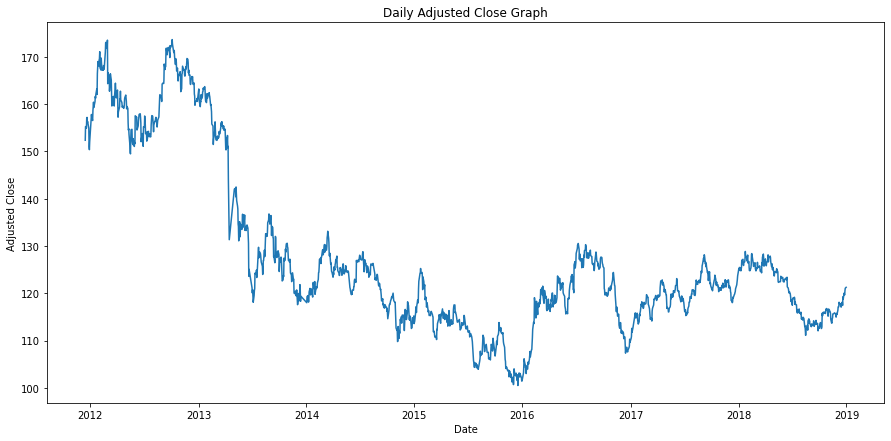

In [15]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date',y='Adj Close',data=df)
plt.xlabel('Date');
plt.ylabel('Adjusted Close');
plt.title('Daily Adjusted Close Graph');

### The dataset has S&P and Dow Jones Index
### Finding relation between S&P and DJ(Dow Jones) and gold index

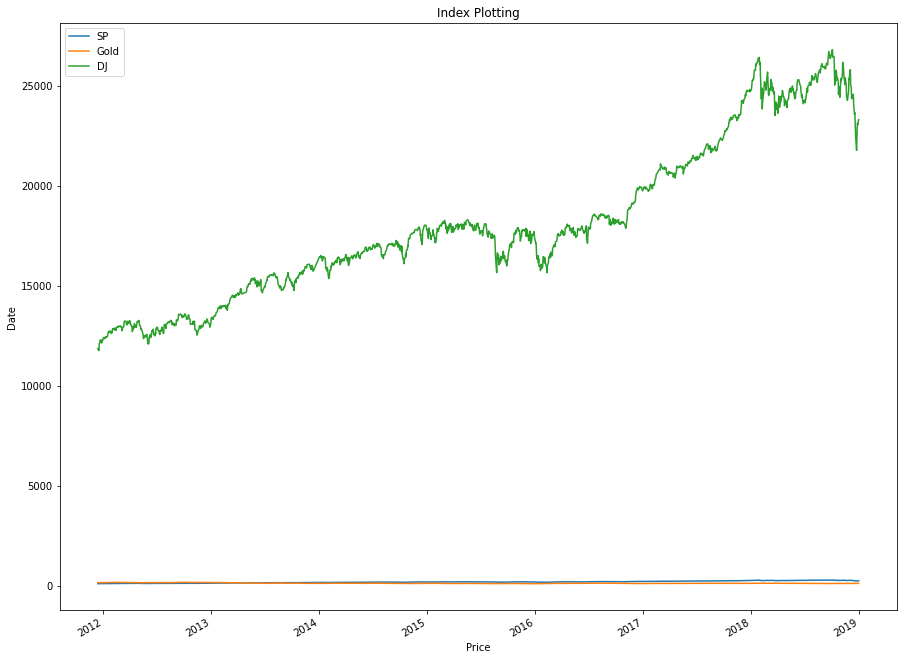

In [16]:

y1=df['SP_Ajclose']

y2=df['Adj Close']
y3=df['DJ_Ajclose']

data = pd.DataFrame({'SP':y1,'Gold':y2,'DJ':y3})
d=data.plot(title='Index Plotting',figsize=(15,12));
d.set_ylabel('Date');
d.set_xlabel('Price');
plt.show();

### Finding correlation between the 3 indexes

In [17]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

### Plotting a heatmap of the 3 indexes to find relation

<AxesSubplot:>

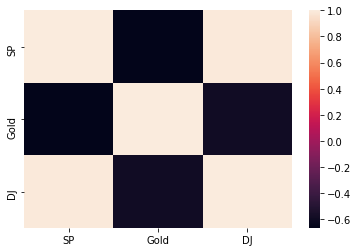

In [18]:
sns.heatmap(corr_array,xticklabels=data.columns,yticklabels=data.columns)

### There seems to be no relation of gold with neither of the indexes.
#### But we still find that DJ and SP are correlated

### Finding the correlation between all the columns

In [19]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

### Plotting a heatmap of all the columns

<AxesSubplot:>

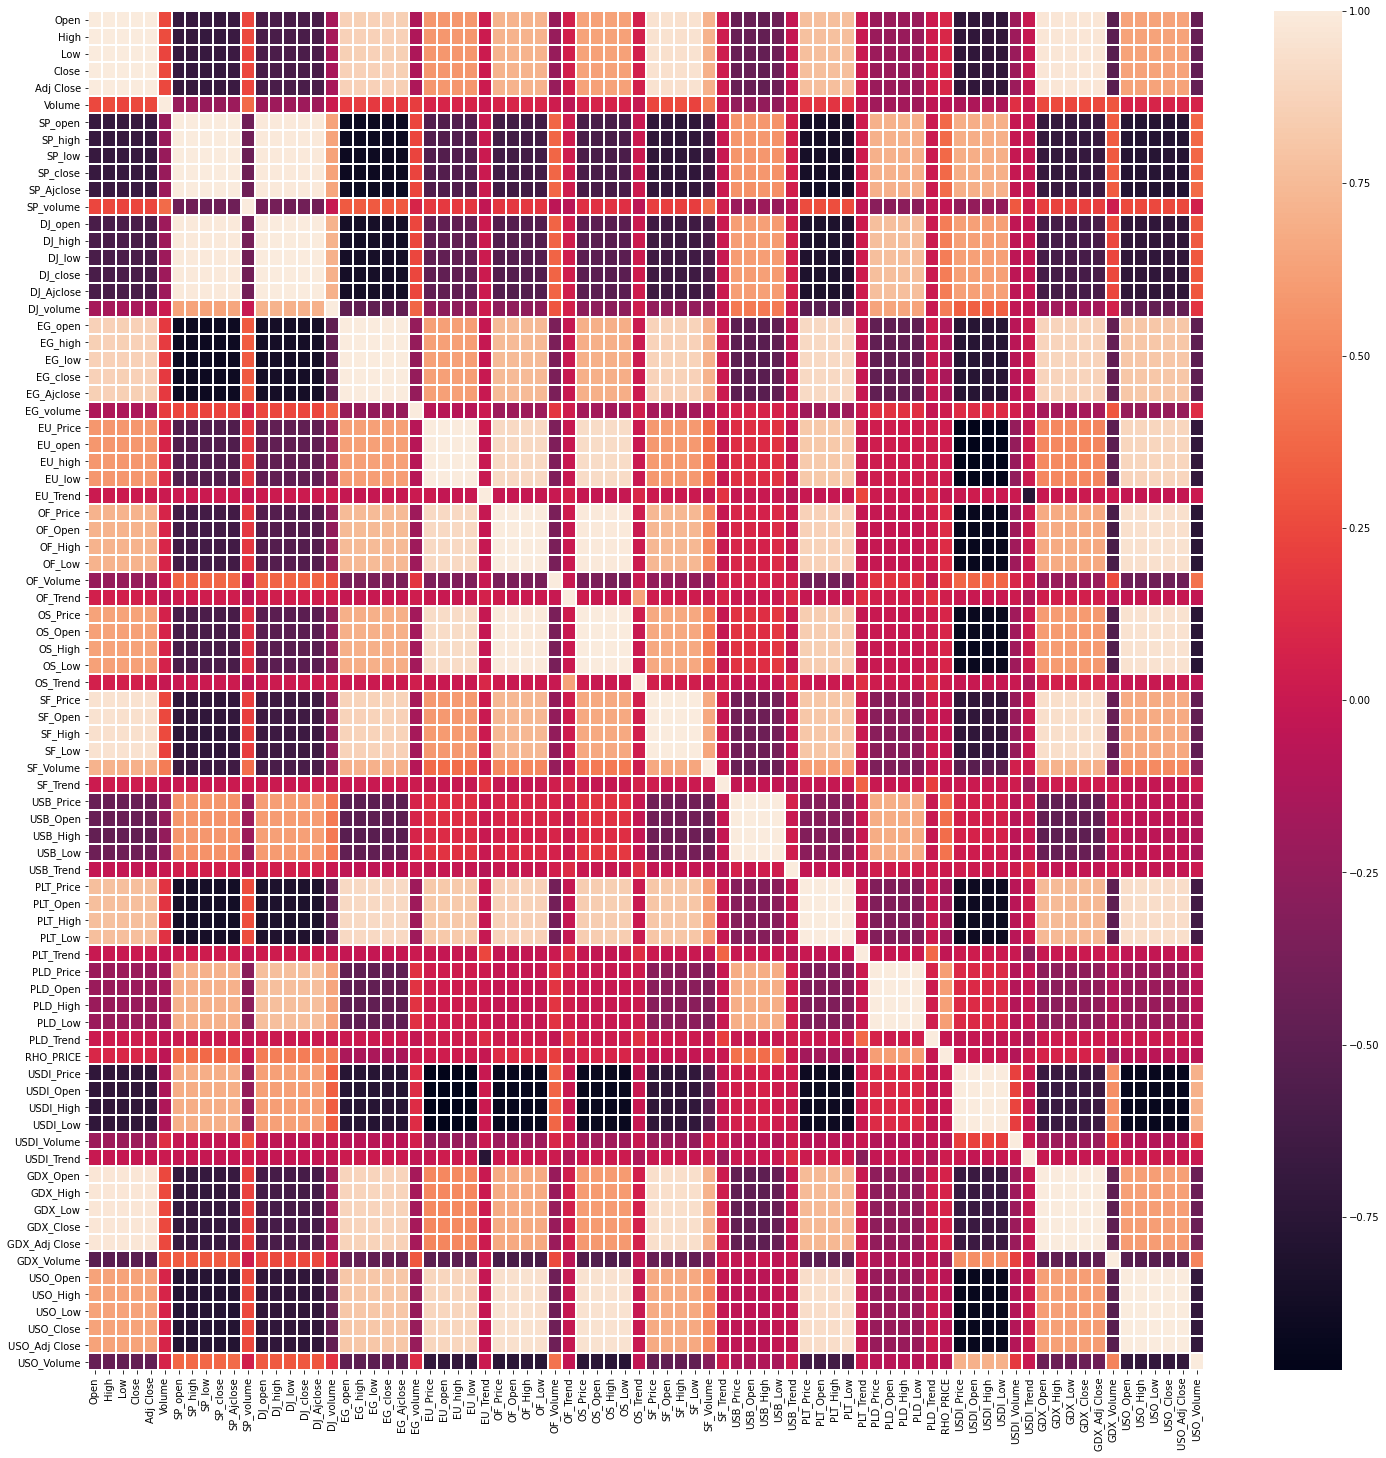

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_array,xticklabels=df.columns,yticklabels=df.columns,linewidths=2)

### Finding highest and lowest correlated columns

In [21]:
corr_mat =correlation.corr()
coeff = corr_mat['Adj Close'].sort_values(ascending = False)

### Highly Correlated Values

In [22]:
coeff[coeff>0.5]

Close            1.000000
Adj Close        1.000000
Low              0.999991
High             0.999990
Open             0.999989
GDX_Low          0.999108
GDX_Open         0.999032
GDX_Close        0.999015
GDX_High         0.998953
GDX_Adj Close    0.998925
SF_Low           0.998181
SF_Price         0.998048
SF_Open          0.998014
SF_High          0.997875
EG_low           0.985659
EG_open          0.985548
EG_close         0.985478
EG_high          0.985306
EG_Ajclose       0.985131
SF_Volume        0.982159
PLT_High         0.967082
PLT_Price        0.966961
PLT_Open         0.966782
PLT_Low          0.966636
USO_High         0.929826
USO_Close        0.929609
USO_Adj Close    0.929609
USO_Open         0.929570
USO_Low          0.929172
OF_High          0.925818
OF_Price         0.925359
OF_Open          0.924943
OF_Low           0.924433
OS_High          0.903344
OS_Open          0.902324
OS_Price         0.902312
OS_Low           0.901569
EU_high          0.887717
EU_Price    

### Non Correlated Values

In [23]:
coeff[coeff<0]

SF_Trend      -0.049784
EU_Trend      -0.053464
OF_Trend      -0.070489
PLT_Trend     -0.144657
USB_Trend     -0.271175
RHO_PRICE     -0.526440
USDI_Volume   -0.540394
USB_Low       -0.748493
USB_Open      -0.767194
USB_Price     -0.768888
PLD_Low       -0.779308
PLD_Open      -0.780353
PLD_Price     -0.780869
PLD_High      -0.783879
USB_High      -0.785632
EG_volume     -0.790091
DJ_volume     -0.859087
USO_Volume    -0.869464
OF_Volume     -0.880539
GDX_Volume    -0.906263
USDI_High     -0.937661
USDI_Open     -0.937987
USDI_Price    -0.938306
USDI_Low      -0.938784
DJ_low        -0.945309
DJ_Ajclose    -0.945526
DJ_close      -0.945526
DJ_open       -0.945550
DJ_high       -0.945688
SP_Ajclose    -0.958082
SP_low        -0.960242
SP_close      -0.960420
SP_open       -0.960438
SP_high       -0.960571
Name: Adj Close, dtype: float64

In [24]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [25]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

### Function to plot Highly Correlated Columns with respect to Target Column

In [26]:
def scatter(i,ax1):
    ax1.scatter(df.index, df[i], s=10, c='lightblue', marker="s", label=i)
    ax1.scatter(df.index,df['Adj Close'], s=10, c='gold', marker="o", label='Adj Close')
    plt.legend(loc='upper left');
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('{} vs Adj Close graph'.format(i))

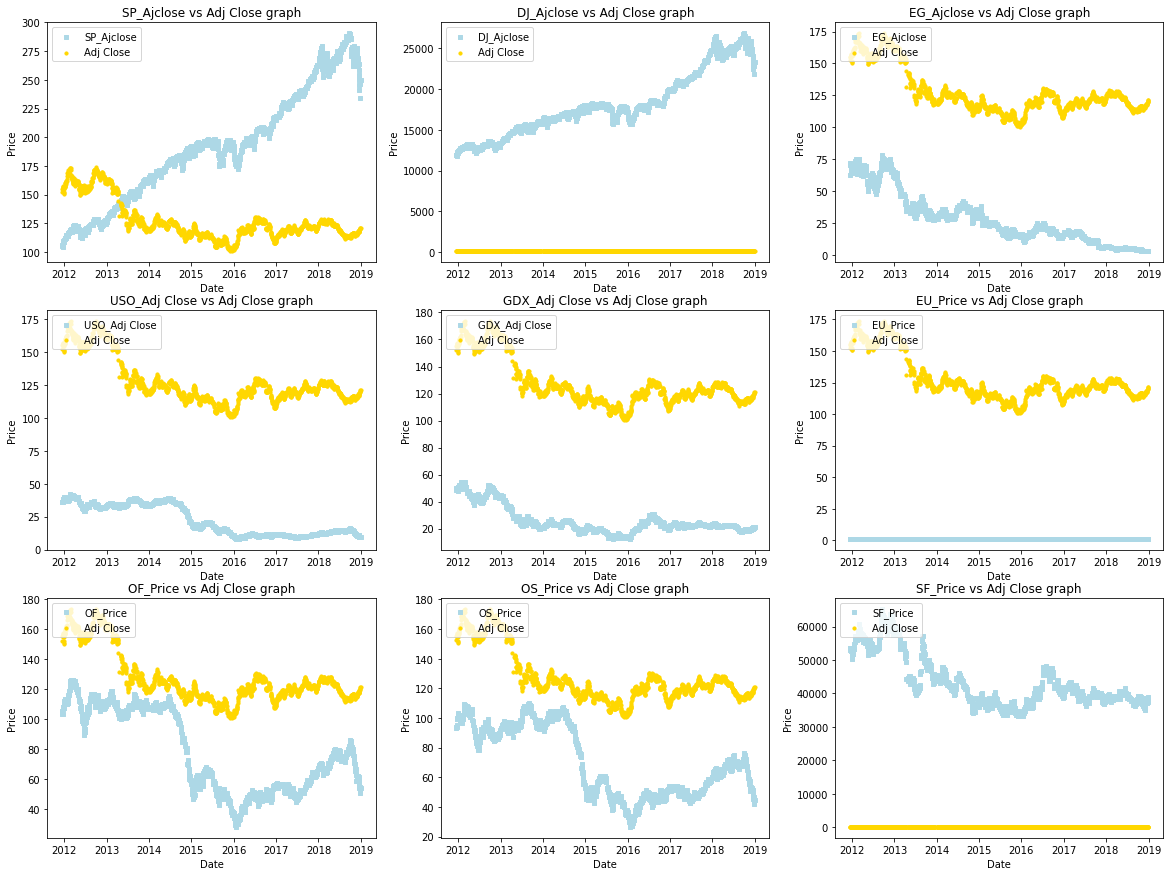

In [35]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(331)
scatter('SP_Ajclose',ax1)
ax1 = fig.add_subplot(332)
scatter('DJ_Ajclose',ax1)
ax1 = fig.add_subplot(333)
scatter('EG_Ajclose',ax1)
ax1 = fig.add_subplot(334)
scatter('USO_Adj Close',ax1)
ax1 = fig.add_subplot(335)
scatter('GDX_Adj Close',ax1)
ax1 = fig.add_subplot(336)
scatter('EU_Price',ax1)
ax1 = fig.add_subplot(337)
scatter('OF_Price',ax1)
ax1 = fig.add_subplot(338)
scatter('OS_Price',ax1)
ax1 = fig.add_subplot(339)
scatter('SF_Price',ax1)


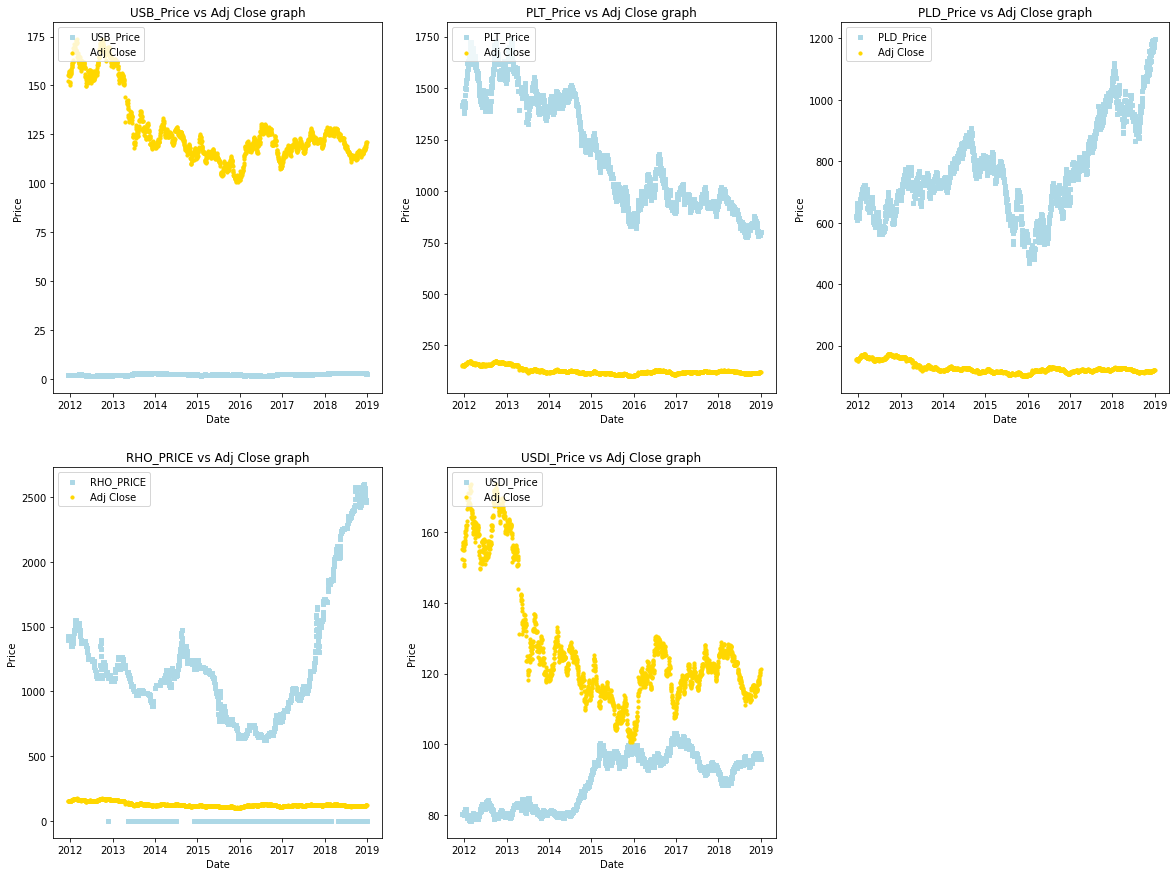

In [36]:
fig=plt.figure(figsize=(20,15))
plt.tight_layout(pad=3.0)
ax1 = fig.add_subplot(231)
scatter('USB_Price',ax1)
ax1 = fig.add_subplot(232)
scatter('PLT_Price',ax1)
ax1 = fig.add_subplot(233)
scatter('PLD_Price',ax1)
ax1 = fig.add_subplot(234)
scatter('RHO_PRICE',ax1)
ax1 = fig.add_subplot(235)
scatter('USDI_Price',ax1)